# Project for the course "*Statistical Methods for Machine Learning*", aa 2019/2020, Università degli Studi di Milano
## Instructor: **Prof. Nicolò Cesa-Bianchi**
## Student: **Andrea Rovati** (id **943388**)

In [1]:
import os, math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler # could be removed 
from sklearn.metrics import r2_score

In [2]:
sns.set(color_codes = True)

In [3]:
LOCATION = os.getcwd()
DPI = 350
STORE_IMAGES = 'report/images/'
SAVE_IMG = False

### The project suppose that data are **in the same folder** as the project

In [4]:
df = pd.read_csv(LOCATION + '/cal-housing.csv')
df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)

In [5]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.01     36.06                25.0       1505.0             NaN   
1    -119.46     35.14                30.0       2943.0             NaN   
2    -122.44     37.80                52.0       3830.0             NaN   
3    -118.72     34.28                17.0       3051.0             NaN   
4    -121.93     36.62                34.0       2351.0             NaN   

   population  households  median_income  median_house_value ocean_proximity  
0      1392.0       359.0         1.6812             47700.0          INLAND  
1      1565.0       584.0         2.5313             45800.0          INLAND  
2      1310.0       963.0         3.4801            500001.0        NEAR BAY  
3      1705.0       495.0         5.7376            218600.0       <1H OCEAN  
4      1063.0       428.0         3.7250            278000.0      NEAR OCEAN

In [6]:
set(df['ocean_proximity'])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

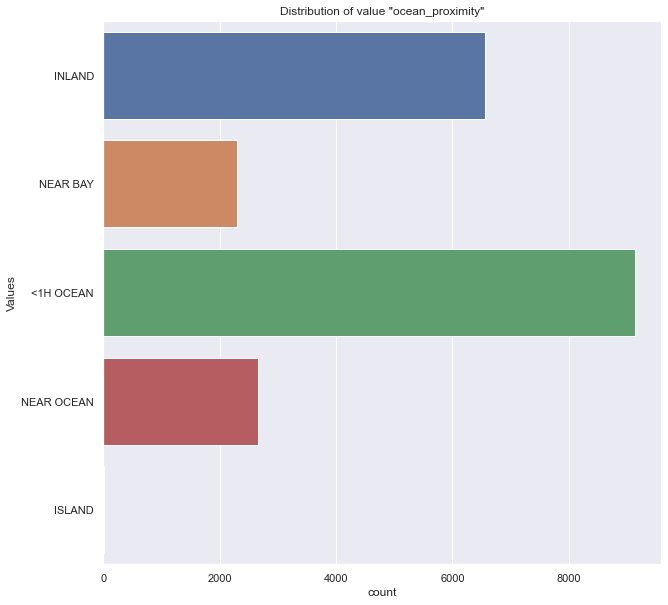

In [7]:
plt.figure(figsize = (10, 10))
g = sns.countplot(y = df['ocean_proximity'])
g.set_ylabel('Values')
g.set_title('Distribution of value \"ocean_proximity\"')
plt.savefig(STORE_IMAGES + 'ocean_proximity.png', dpi = DPI, bbox_inches = 'tight')
plt.show()

## Handling cathegorical value

In [8]:
vs = {x for x in df['ocean_proximity']}
d  = {x:i for i,x in enumerate(vs)}

res = []
for l in range(len(df)):
    res.append(d[df.iloc[l]['ocean_proximity']])
att = np.array(res)
df['ocean_proximity'] = att
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.01     36.06                25.0       1505.0             NaN   
1    -119.46     35.14                30.0       2943.0             NaN   
2    -122.44     37.80                52.0       3830.0             NaN   
3    -118.72     34.28                17.0       3051.0             NaN   
4    -121.93     36.62                34.0       2351.0             NaN   

   population  households  median_income  median_house_value  ocean_proximity  
0      1392.0       359.0         1.6812             47700.0                2  
1      1565.0       584.0         2.5313             45800.0                2  
2      1310.0       963.0         3.4801            500001.0                1  
3      1705.0       495.0         5.7376            218600.0                3  
4      1063.0       428.0         3.7250            278000.0                0

In [9]:
dfNoNan = df.copy()
dfNoNan = dfNoNan.dropna()

## Handling *nan* values for column *total_bedrooms*

In [10]:
howMany = len([1 for x in range(len(df)) if np.isnan(df['total_bedrooms'][x])])
print(f"Number of \"nan\" rows: {howMany}")
print(f"Fraction of rows with \"nan\" value: {howMany / len(df)}")

Number of "nan" rows: 207
Fraction of rows with "nan" value: 0.01002906976744186


In [11]:
mean = round(np.mean(df['total_bedrooms']))
for x in range(len(df)):
    if np.isnan(df['total_bedrooms'][x]): df['total_bedrooms'][x] = mean

<ipython-input-11-42ae301d95a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if np.isnan(df['total_bedrooms'][x]): df['total_bedrooms'][x] = mean


### Distribution of the predicted label (or to be predicted?)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


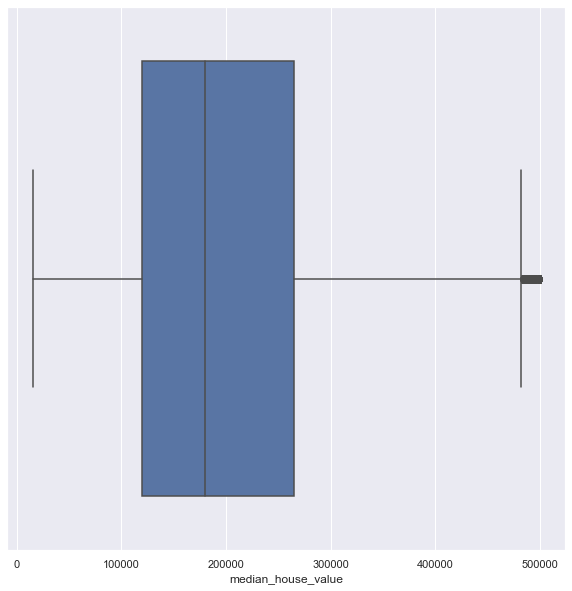

In [12]:
plt.figure(figsize = (10, 10))
sns.boxplot(df['median_house_value'])
if SAVE_IMG:
    plt.savefig(STORE_IMAGES + 'median_house_value_distribution_boxplot.png', dpi = DPI, bbox_inches = 'tight')
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


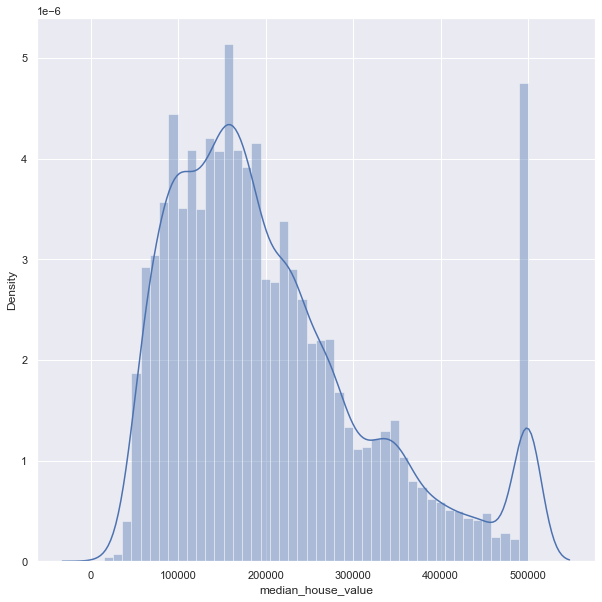

In [13]:
plt.figure(figsize = (10, 10))
sns.distplot(df['median_house_value'])
if SAVE_IMG:
    plt.savefig(STORE_IMAGES + 'median_house_value_distribution.png', dpi = DPI, bbox_inches = 'tight')
plt.show()

In [14]:
cols = list(df.columns)
cols1, cols2 = cols[: len(cols) // 2], cols[len(cols) // 2:]

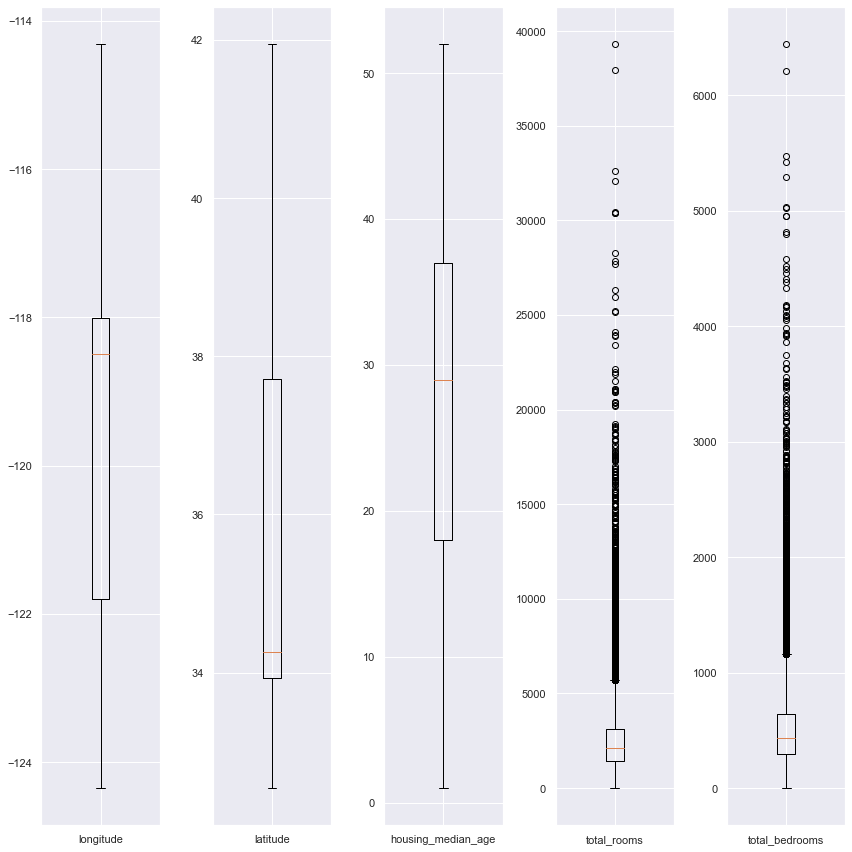

In [15]:
fig, axs = plt.subplots(1, 5, figsize = (12, 12))
for i, col in enumerate(cols1): axs[i].boxplot(df[col], labels = [col])
fig.tight_layout()
if SAVE_IMG:
    plt.savefig(STORE_IMAGES + 'data_distribution1.png', dpi = DPI, bbox_inches = 'tight')
plt.show()

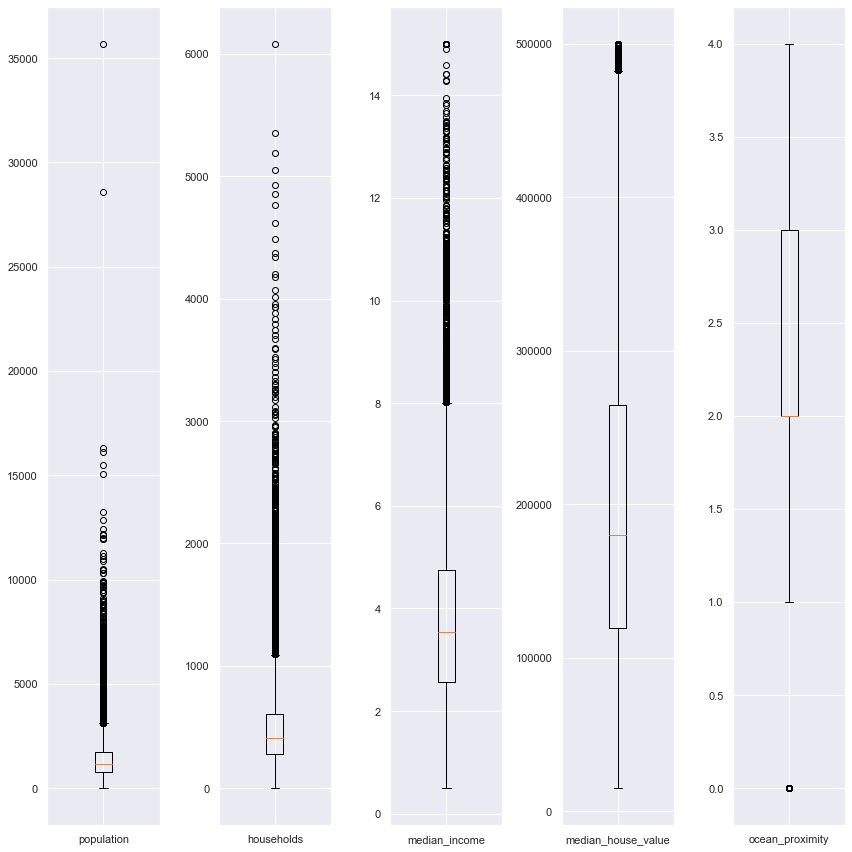

In [16]:
fig, axs = plt.subplots(1, 5, figsize = (12, 12))
for i, col in enumerate(cols2): axs[i].boxplot(df[col], labels = [col])
fig.tight_layout()
if SAVE_IMG:
    plt.savefig(STORE_IMAGES + 'data_distribution2.png', dpi = DPI, bbox_inches = 'tight')
plt.show()

In [17]:
print(f"Up to {len(df)} rows in the dataset")
for col in cols: print(f"We have {len(set(df[col]))} different values for column {col}")

Up to 20640 rows in the dataset
We have 844 different values for column longitude
We have 862 different values for column latitude
We have 52 different values for column housing_median_age
We have 5926 different values for column total_rooms
We have 1923 different values for column total_bedrooms
We have 3888 different values for column population
We have 1815 different values for column households
We have 12928 different values for column median_income
We have 3842 different values for column median_house_value
We have 5 different values for column ocean_proximity


### Aim of the project

1. Implement **from scratch** the ridge regression algorithm for regression with square loss.
2. Apply the algorithm to the prediction of the label ***median_house_value*** in this dataset.
3. Study the dependence of the cross-validated risk estimate on the parameter alpha of ridge regression.
4. **Try using PCA** to improve the risk estimate.
    + Optionally, **use nested cross-validated risk estimates** to remove the need of choosing the parameter.

$
\DeclareMathOperator*{\argmin}{arg\,min} % thin space, limits underneath in displays
\DeclareMathOperator*{\argmin}{argmin} % no space, limits underneath in displays
\DeclareMathOperator{\argmin}{arg\,min} % thin space, limits on side in displays
\DeclareMathOperator{\argmin}{argmin} % no space, limits on side in displays
$
Recall that:

$$\textbf{w}_\alpha= \underset{w \in \mathbb{R}^d}\argmin ‖S\textbf{w}−\textbf{y}‖^2+\alpha‖\textbf{w}‖^2$$

In [18]:
D = len(df.columns)

In [19]:
#df = df.sample(frac = 1, random_state = 42).reset_index(drop = True)
#df

In [20]:
squareLoss = lambda predict, effective: (predict - effective) ** 2

In [21]:
copy = df.copy()
Y = copy['median_house_value'][::]
del copy['median_house_value']
X = copy[::]
del copy
X.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -119.01     36.06                25.0       1505.0           538.0   
1    -119.46     35.14                30.0       2943.0           538.0   
2    -122.44     37.80                52.0       3830.0           538.0   
3    -118.72     34.28                17.0       3051.0           538.0   
4    -121.93     36.62                34.0       2351.0           538.0   

   population  households  median_income  ocean_proximity  
0      1392.0       359.0         1.6812                2  
1      1565.0       584.0         2.5313                2  
2      1310.0       963.0         3.4801                1  
3      1705.0       495.0         5.7376                3  
4      1063.0       428.0         3.7250                0

### Note: <Matrix>.T makes the transpose

In [22]:
flatten = lambda l: [elem for sublist in l for elem in sublist]

def kFold(i, data, labels, totalData = len(X)):
    div = totalData // i
    x = [data[n * div: (n + 1) * div] if n != i - 1 else data[n * div:] for n in range(i)]
    y = [labels[n * div: (n + 1) * div] if n != i - 1 else labels[n * div:] for n in range(i)]
    # training data, labels for training, test data
    res = [(x[:fold] + x[fold + 1:], y[:fold] + y[fold + 1:], x[fold], y[fold]) for fold in range(i)]
    return [(flatten(res[fold][0]), flatten(res[fold][1]), res[fold][2], res[fold][3]) for fold in range(i)]

In [23]:
NUM_FOLD = 5
FOLDS = kFold(NUM_FOLD, np.array(X), np.array(Y), len(X))
ALPHA = [.000001, .00001, .0001, .001, .01, .1, 1, 10, 100, 1000, 10000, 15000, 20000, 50000, 75000, 90000, 100000, 10000000, 1000000000]
INNER_FOLDS = 3

In [24]:
def nestedCross(folds, alphas, dimensions):
    totalScoreDict, totalErrorsDict = {al: None for al in alphas}, {al: None for al in alphas}
    I = np.identity(dimensions)
    for al in alphas:
        errors = []
        for j in range(len(folds)):
            predicted = []
            x_train = np.array(folds[j][0])
            y_train = np.array(folds[j][1])
            W = np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + al * I), x_train.T), y_train)
            x_test = np.array(folds[j][2])
            y_test = np.array(folds[j][3])
            for jj in range(len(x_test)):
                a = x_test[jj].reshape((dimensions, 1))
                val_pred = np.dot(W.T, a)
                predicted.append(val_pred)
                errors.append(squareLoss(np.dot(W.T, a), y_test[jj]))
        totalScoreDict[al], totalErrorsDict[al] = r2_score(y_test, predicted), np.mean(errors)
    return totalScoreDict, totalErrorsDict

def evaluate(currentFold, d, scoresList, errorList, dimensions, r2Score = True):
    I = np.identity(dimensions)
    if r2Score: best = max(d.values())
    else: best = min(d.values())
    best_alpha = [key for key in d.keys() if d[key] is best][0]
    x_train = np.array(currentFold[0])
    y_train = np.array(currentFold[1])
    W = np.dot(np.dot(np.linalg.inv(np.dot(x_train.T, x_train) + best_alpha * I), x_train.T), y_train)
    x_test = np.array(currentFold[2])
    y_test = np.array(currentFold[3])
    predicted = []
    errors = []
    for jj in range(len(x_test)):
        a = x_test[jj].reshape((dimensions, 1))
        val_pred = np.dot(W.T, a)
        predicted.append(val_pred)
        errors.append(squareLoss(val_pred, y_test[jj]))
    [errorList.append(x) for x in errors]
    # I've used a pre-defined r2 score function due to it's velocity,
    # I've tested my implementation but was really slower than the predefined
    # one, so I decided to use this one.
    score = r2_score(y_test, predicted)
    scoresList.append(score)
    return score, best_alpha, np.mean(errors), x_test, y_test, W

In [25]:
totalr2Score = {al: None for al in ALPHA}
errorsBestAlphaUsingR2Score, errorsBestAlphaUsingError = [], []
scoresUsingR2Score, scoresUsingError = [], []
count = 1
x_test, y_test, separator = None, None, None
minErr = math.inf

for fold in FOLDS:
    print("---------------------------------------------------------------------------------------------------------")
    print()
    inners = kFold(INNER_FOLDS, fold[0], fold[1], len(fold[0]))
    r2ScoreDict, errorsDict = nestedCross(inners, ALPHA, D - 1)
    s = evaluate(fold, r2ScoreDict, scoresUsingR2Score, errorsBestAlphaUsingR2Score, D - 1, True)
    print(f"Using max r2 score in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    s = evaluate(fold, errorsDict, scoresUsingError, errorsBestAlphaUsingError, D - 1, False)
    print(f"Using min error in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    if s[2] < minErr: minErr, x_test, y_test, separator = s[2:]
    count += 1
    
print("---------------------------------------------------------------------------------------------------------")
print("Using r2 score we get:")
finalError = np.mean(errorsBestAlphaUsingR2Score)
finalScore = np.mean(scoresUsingR2Score)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")
print()
print("Using min error we get:")
finalError = np.mean(errorsBestAlphaUsingError)
finalScore = np.mean(scoresUsingError)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 1 fold to decide we get r2 score 0.563704279556169 with best alpha = 1e-06

Using min error in the 1 fold to decide we get r2 score 0.563704279556169 with best alpha = 1e-06

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 2 fold to decide we get r2 score 0.5911106352599789 with best alpha = 1e-06

Using min error in the 2 fold to decide we get r2 score 0.5910855380159538 with best alpha = 100

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 3 fold to decide we get r2 score 0.5768003311239154 with best alpha = 1e-06

Using min error in the 3 fold to decide we get r2 score 0.5767889956252008 with best alpha = 100

----------------------------------------------------------------------------

As we can see, using min error to decide lead to a minimun mean error at the end and to a bigger mean r2 score! Moreover, the best alpha is almost always different using the two methods!

# Plots

In [26]:
def createPlot(x_test, y_test, W, NAME, X_DIMENSION = 10, Y_DIMENSION = 10, COLOR_PREDICTED = 'r', COLOR_EFFECTIVE = 'b', LOC_LEGEND = 'upper center'):
    tuplePredette = [(i, np.dot(W.T, x)) for i, x in enumerate(np.array(x_test))]
    tupleEffettive = [(i, y) for i, y in enumerate(np.array(y_test))]
    plt.figure(figsize = (10,10))
    plt.plot([x[0] for x in tuplePredette], [x[1] for x in tuplePredette], COLOR_PREDICTED + 'o', markersize = 1, label = 'predicted')
    plt.plot([x[0] for x in tupleEffettive], [x[1] for x in tupleEffettive], COLOR_EFFECTIVE + 'o', markersize = 1, label = 'real')
    plt.legend(fancybox = True, framealpha = 1, shadow = True, loc = LOC_LEGEND)
    plt.ylabel("House value", size = 14)
    if SAVE_IMG:
        plt.savefig(NAME + '.png', dpi = DPI, bbox_inches = 'tight')
    plt.show()

In [27]:
def createScatter(x_test, y_test, W, NAME, COLOR_PREDICTED = 'r', COLOR_EFFECTIVE = 'b', LOC_LEGEND = 'upper left'):   
    tuplePredette = [np.dot(W.T, x) for x in np.array(x_test)]
    plt.figure(figsize = (7,7))
    plt.scatter(y_test, [x for x in tuplePredette], color = COLOR_PREDICTED, s = 1.5)
    plt.plot(y_test, y_test, color = COLOR_EFFECTIVE)
    #plt.legend(fancybox = True, framealpha = 1, shadow = True, loc = LOC_LEGEND)
    plt.xlabel("Real Value", size = 14)
    plt.ylabel("Predicted value", size = 14)
    if SAVE_IMG:
        plt.savefig(NAME + '.png', dpi = DPI, bbox_inches = 'tight')
    plt.show()

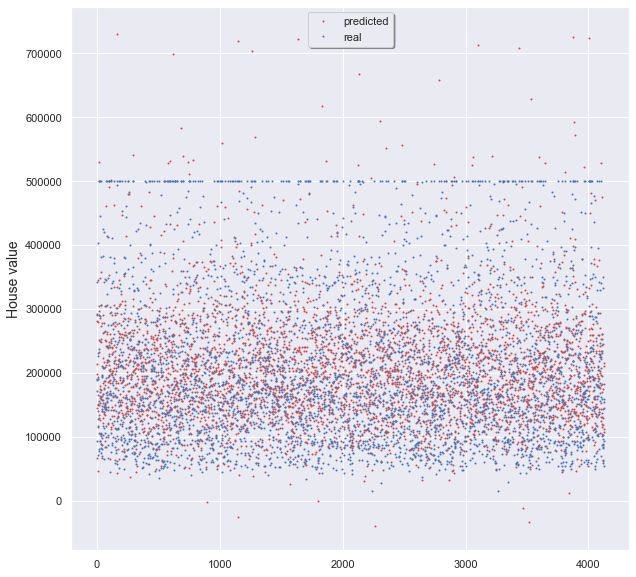

In [28]:
createPlot(x_test, y_test, separator, STORE_IMAGES + 'predictor_without_pca')

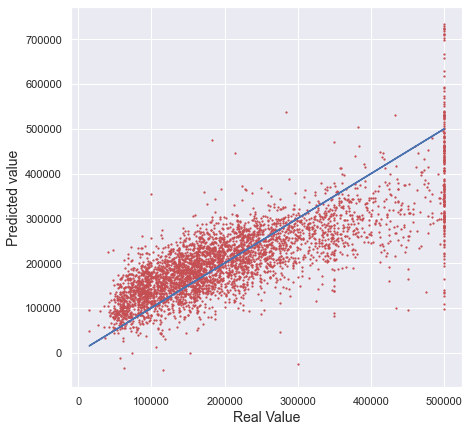

In [29]:
createScatter(x_test, y_test, separator, STORE_IMAGES + 'scatter_without_pca')

### PCA

In [30]:
copy = df.copy()

In [31]:
means = {col: np.mean(copy[col]) for col in copy}
stds = {col: np.std(copy[col]) for col in copy}

res = []

for i in range(len(copy)):
    long = (copy.iloc[i][0] - means['longitude']) / stds['longitude']
    lat = (copy.iloc[i][1] - means['latitude']) / stds['latitude']
    house_age = (copy.iloc[i][2] - means['housing_median_age']) / stds['housing_median_age']
    total_r = (copy.iloc[i][3] - means['total_rooms']) / stds['total_rooms']
    total_b = (copy.iloc[i][4] - means['total_bedrooms']) / stds['total_bedrooms']
    pop = (copy.iloc[i][5] - means['population']) / stds['population']
    house_h = (copy.iloc[i][6] - means['households']) / stds['households']
    med_in = (copy.iloc[i][7] - means['median_income']) / stds['median_income']
    oc = (copy.iloc[i][9] - means['ocean_proximity']) / stds['ocean_proximity']
    res.append([long, lat, house_age, total_r, total_b, pop, house_h, med_in, oc])
    
X = np.array(res)
Y = np.array([(copy.iloc[i][8] - means['median_house_value']) / stds['median_house_value'] for i in range(len(copy))])
del copy, means, stds, res

# Note that this method is quickier than the previous one, use that if you want to run
# faster the project.
# From now on, I'll use the scikit implementation just to run faster the experiment.

# scaler = StandardScaler()
# copy = scaler.fit_transform(copy)
# X = np.array([[x for x in copy[i][0:8]] + [copy[i][9]] for i in range(len(copy))])
# Y = np.array([copy[i][8] for i in range(len(copy))])
# del copy

In [32]:
meanData = np.mean(X)
p = X - meanData
cov = np.cov(p.T)
vals, vect = np.linalg.eig(cov)

In [33]:
NUM_OF_COMPONENTS = 4

In [34]:
colNames = [(i, x) for i,x in enumerate(df.columns) if x != 'median_house_value']
components = [X.dot(vect[_]) for _ in range(NUM_OF_COMPONENTS)]
res = pd.DataFrame(components[0], columns = [colNames[0][1]])
for _ in range(1, NUM_OF_COMPONENTS): res[colNames[_][1]] = components[_]
res.head()

longitude  latitude  housing_median_age  total_rooms
0   0.701166  0.764790            0.033138    -0.209081
1   0.424793  0.155536            0.004047    -0.476982
2  -1.089729  0.403186            0.840278    -1.500923
3  -0.197351 -0.873426           -0.552902     0.719889
4  -0.114759  0.537599            0.475035    -0.318697

In [35]:
cols = list(res.columns)

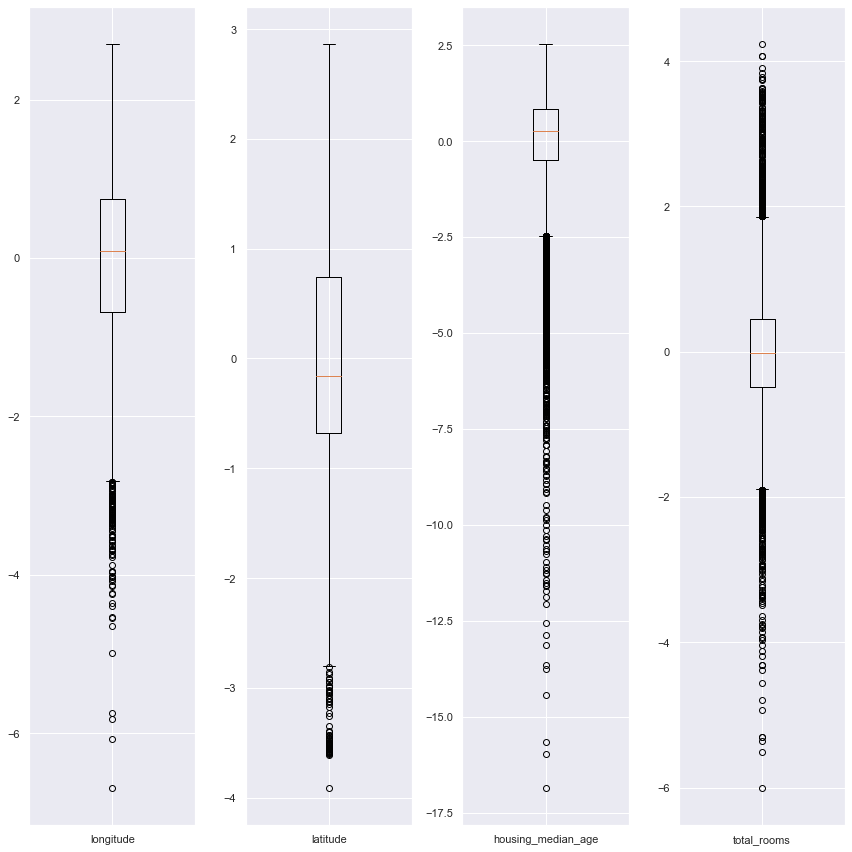

In [36]:
fig, axs = plt.subplots(1, len(cols), figsize = (12, 12))
for i, col in enumerate(cols): axs[i].boxplot(res[col], labels = [col])
fig.tight_layout()
plt.show()

In [37]:
FOLDS = kFold(NUM_FOLD, np.array(res), np.array(Y), len(res))

In [38]:
totalr2Score = {al: None for al in ALPHA}
errorsBestAlphaUsingR2Score, errorsBestAlphaUsingError = [], []
scoresUsingR2Score, scoresUsingError = [], []
count = 1
x_test, y_test, separator = None, None, None
minErr = math.inf

for fold in FOLDS:
    print("---------------------------------------------------------------------------------------------------------")
    print()
    inners = kFold(INNER_FOLDS, fold[0], fold[1], len(fold[0]))
    r2ScoreDict, errorsDict = nestedCross(inners, ALPHA, NUM_OF_COMPONENTS)
    s = evaluate(fold, r2ScoreDict, scoresUsingR2Score, errorsBestAlphaUsingR2Score, NUM_OF_COMPONENTS, True)
    print(f"Using max r2 score in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    s = evaluate(fold, errorsDict, scoresUsingError, errorsBestAlphaUsingError, NUM_OF_COMPONENTS, False)
    print(f"Using min error in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    if s[2] < minErr: minErr, x_test, y_test, separator = s[2:]
    count += 1

print("---------------------------------------------------------------------------------------------------------")
print("Using r2 score we get:")
finalError = np.mean(errorsBestAlphaUsingR2Score)
finalScore = np.mean(scoresUsingR2Score)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")
print()
print("Using min error we get:")
finalError = np.mean(errorsBestAlphaUsingError)
finalScore = np.mean(scoresUsingError)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 1 fold to decide we get r2 score 0.521662781135318 with best alpha = 100

Using min error in the 1 fold to decide we get r2 score 0.52049902156644 with best alpha = 10

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 2 fold to decide we get r2 score 0.5506753502097178 with best alpha = 10

Using min error in the 2 fold to decide we get r2 score 0.5506753502097178 with best alpha = 10

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 3 fold to decide we get r2 score 0.5401873653190679 with best alpha = 10

Using min error in the 3 fold to decide we get r2 score 0.5402251035318453 with best alpha = 1

-------------------------------------------------------------------------------------------

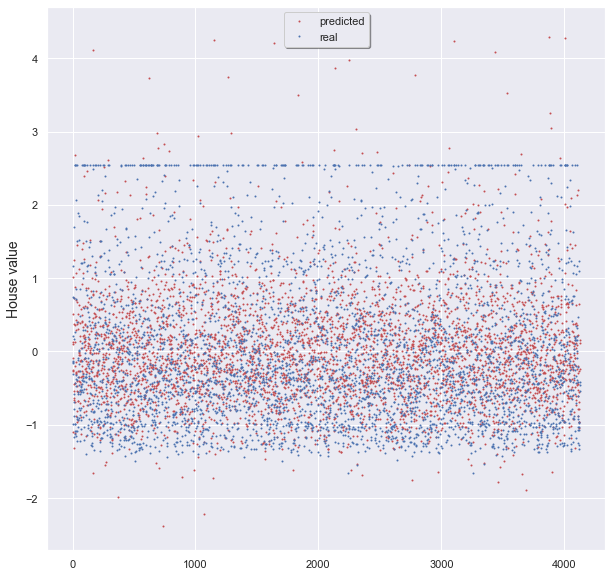

In [39]:
createPlot(x_test, y_test, separator, STORE_IMAGES + 'plot_pca_normalization')

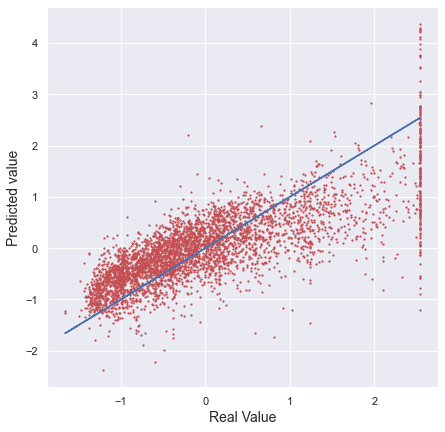

In [40]:
createScatter(x_test, y_test, separator, STORE_IMAGES + 'scatter_pca_normalization')


### What about not considering nan rows?

In [41]:
copy = dfNoNan.copy()
Y = copy['median_house_value'][::]
del copy['median_house_value']
X = copy[::]
del copy

In [42]:
FOLDS = kFold(NUM_FOLD, np.array(X), np.array(Y), len(X))

In [43]:
totalr2Score = {al: None for al in ALPHA}
errorsBestAlphaUsingR2Score, errorsBestAlphaUsingError = [], []
scoresUsingR2Score, scoresUsingError = [], []
count = 1
x_test, y_test, separator = None, None, None
minErr = math.inf

for fold in FOLDS:
    print("---------------------------------------------------------------------------------------------------------")
    print()
    inners = kFold(INNER_FOLDS, fold[0], fold[1], len(fold[0]))
    r2ScoreDict, errorsDict = nestedCross(inners, ALPHA, D - 1)
    s = evaluate(fold, r2ScoreDict, scoresUsingR2Score, errorsBestAlphaUsingR2Score, D - 1, True)
    print(f"Using max r2 score in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    s = evaluate(fold, errorsDict, scoresUsingError, errorsBestAlphaUsingError, D - 1, False)
    print(f"Using min error in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    if s[2] < minErr: minErr, x_test, y_test, separator = s[2:]
    count += 1

print("---------------------------------------------------------------------------------------------------------")
print("Using r2 score we get:")
finalError = np.mean(errorsBestAlphaUsingR2Score)
finalScore = np.mean(scoresUsingR2Score)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")
print()
print("Using min error we get:")
finalError = np.mean(errorsBestAlphaUsingError)
finalScore = np.mean(scoresUsingError)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 1 fold to decide we get r2 score 0.5709077600646371 with best alpha = 1e-06

Using min error in the 1 fold to decide we get r2 score 0.5709077600646371 with best alpha = 1e-06

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 2 fold to decide we get r2 score 0.5919589900253016 with best alpha = 1e-06

Using min error in the 2 fold to decide we get r2 score 0.5919589900253016 with best alpha = 1e-06

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 3 fold to decide we get r2 score 0.5761325131742183 with best alpha = 1e-06

Using min error in the 3 fold to decide we get r2 score 0.5761324932358545 with best alpha = 10

-------------------------------------------------------------------------

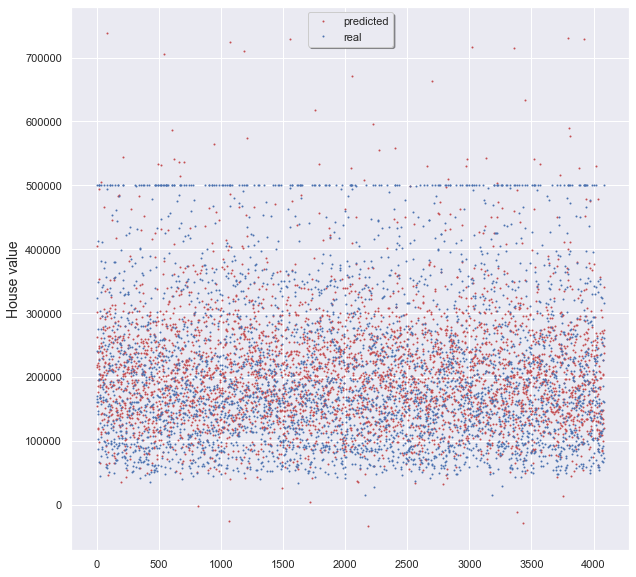

In [44]:
createPlot(x_test, y_test, separator, STORE_IMAGES + 'no_nan_without_pca_plot')

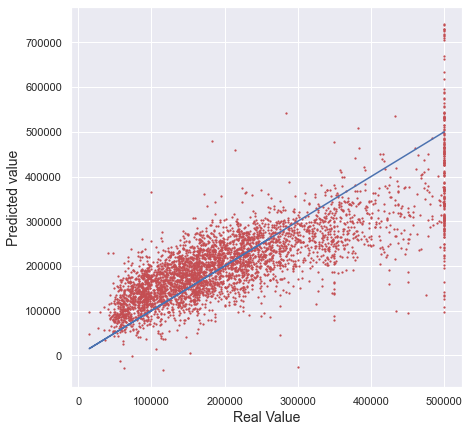

In [45]:
createScatter(x_test, y_test, separator, STORE_IMAGES + 'no_nan_without_pca_scatter')

### Let's try PCA in this case

In [46]:
copy = dfNoNan.copy()

In [47]:
#means = {col: np.mean(copy[col]) for col in copy}
#stds = {col: np.std(copy[col]) for col in copy}

#res = []

#for i in range(len(copy)):
#    long = (copy.iloc[i][0] - means['longitude']) / stds['longitude']
#    lat = (copy.iloc[i][1] - means['latitude']) / stds['latitude']
#    house_age = (copy.iloc[i][2] - means['housing_median_age']) / stds['housing_median_age']
#    total_r = (copy.iloc[i][3] - means['total_rooms']) / stds['total_rooms']
#    total_b = (copy.iloc[i][4] - means['total_bedrooms']) / stds['total_bedrooms']
#    pop = (copy.iloc[i][5] - means['population']) / stds['population']
#    house_h = (copy.iloc[i][6] - means['households']) / stds['households']
#    med_in = (copy.iloc[i][7] - means['median_income']) / stds['median_income']
#    oc = (copy.iloc[i][9] - means['ocean_proximity']) / stds['ocean_proximity']
#    res.append([long, lat, house_age, total_r, total_b, pop, house_h, med_in, oc])
    
#X = np.array(res)
#Y = np.array([(copy.iloc[i][8] - means['median_house_value']) / stds['median_house_value'] for i in range(len(copy))])
#del copy

scaler = StandardScaler()
copy = scaler.fit_transform(copy)
X = np.array([[x for x in copy[i][0:8]] + [copy[i][9]] for i in range(len(copy))])
Y = np.array([copy[i][8] for i in range(len(copy))])
del copy

In [48]:
meanData = np.mean(X)
p = X - meanData
cov = np.cov(p.T)
vals, vect = np.linalg.eig(cov)

In [49]:
NUM_OF_COMPONENTS = 4

In [50]:
colNames = [(i, x) for i,x in enumerate(df.columns) if x != 'median_house_value']
components = [X.dot(vect[_]) for _ in range(NUM_OF_COMPONENTS)]
res = pd.DataFrame(components[0], columns = [colNames[0][1]])
for _ in range(1, NUM_OF_COMPONENTS): res[colNames[_][1]] = components[_]
res.head()

longitude  latitude  housing_median_age  total_rooms
0  -1.960510 -0.904126            0.903466    -0.335616
1   0.517072 -0.832270            0.547828    -0.384647
2  -0.681773  0.482556           -0.450263     0.316519
3  -0.238146 -1.839107            1.271874    -0.116718
4   0.961581  2.087524            1.480810    -3.831610

In [51]:
FOLDS = kFold(NUM_FOLD, np.array(res), np.array(Y), len(res))

In [52]:
totalr2Score = {al: None for al in ALPHA}
errorsBestAlphaUsingR2Score, errorsBestAlphaUsingError = [], []
scoresUsingR2Score, scoresUsingError = [], []
count = 1
x_test, y_test, separator = None, None, None
minErr = math.inf

for fold in FOLDS:
    print("---------------------------------------------------------------------------------------------------------")
    print()
    inners = kFold(INNER_FOLDS, fold[0], fold[1], len(fold[0]))
    r2ScoreDict, errorsDict = nestedCross(inners, ALPHA, NUM_OF_COMPONENTS)
    s = evaluate(fold, r2ScoreDict, scoresUsingR2Score, errorsBestAlphaUsingR2Score, NUM_OF_COMPONENTS, True)
    print(f"Using max r2 score in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    s = evaluate(fold, errorsDict, scoresUsingError, errorsBestAlphaUsingError, NUM_OF_COMPONENTS, False)
    print(f"Using min error in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    if s[2] < minErr: minErr, x_test, y_test, separator = s[2:]
    count += 1

print("---------------------------------------------------------------------------------------------------------")
print("Using r2 score we get:")
finalError = np.mean(errorsBestAlphaUsingR2Score)
finalScore = np.mean(scoresUsingR2Score)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")
print()
print("Using min error we get:")
finalError = np.mean(errorsBestAlphaUsingError)
finalScore = np.mean(scoresUsingError)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 1 fold to decide we get r2 score 0.5566005877834066 with best alpha = 100

Using min error in the 1 fold to decide we get r2 score 0.5565208091581468 with best alpha = 1

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 2 fold to decide we get r2 score 0.5788084995069112 with best alpha = 10

Using min error in the 2 fold to decide we get r2 score 0.5788153811345136 with best alpha = 1

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 3 fold to decide we get r2 score 0.5642342627809583 with best alpha = 10

Using min error in the 3 fold to decide we get r2 score 0.5642427488206359 with best alpha = 1

------------------------------------------------------------------------------------------

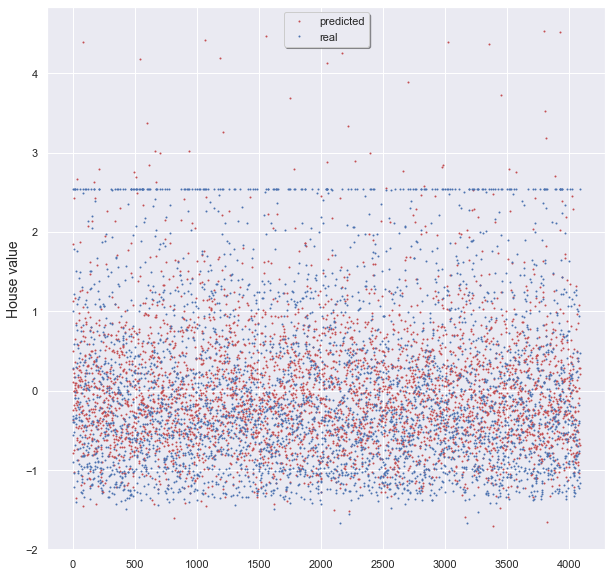

In [53]:
createPlot(x_test, y_test, separator, STORE_IMAGES + 'no_nan_with_pca_plot')

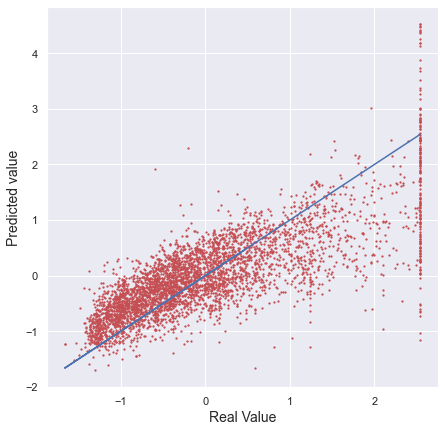

In [54]:
createScatter(x_test, y_test, separator, STORE_IMAGES + 'no_nan_with_pca_scatter')

### Last try, PCA with all the components

In [55]:
copy = df.copy()

In [56]:
#means = {col: np.mean(copy[col]) for col in copy}
#stds = {col: np.std(copy[col]) for col in copy}

#res = []

#for i in range(len(copy)):
#    long = (copy.iloc[i][0] - means['longitude']) / stds['longitude']
#    lat = (copy.iloc[i][1] - means['latitude']) / stds['latitude']
#    house_age = (copy.iloc[i][2] - means['housing_median_age']) / stds['housing_median_age']
#    total_r = (copy.iloc[i][3] - means['total_rooms']) / stds['total_rooms']
#    total_b = (copy.iloc[i][4] - means['total_bedrooms']) / stds['total_bedrooms']
#    pop = (copy.iloc[i][5] - means['population']) / stds['population']
#    house_h = (copy.iloc[i][6] - means['households']) / stds['households']
#    med_in = (copy.iloc[i][7] - means['median_income']) / stds['median_income']
#    oc = (copy.iloc[i][9] - means['ocean_proximity']) / stds['ocean_proximity']
#    res.append([long, lat, house_age, total_r, total_b, pop, house_h, med_in, oc])
    
#X = np.array(res)
#Y = np.array([(copy.iloc[i][8] - means['median_house_value']) / stds['median_house_value'] for i in range(len(copy))])
#del copy

scaler = StandardScaler()
copy = scaler.fit_transform(copy)
X = np.array([[x for x in copy[i][0:8]] + [copy[i][9]] for i in range(len(copy))])
Y = np.array([copy[i][8] for i in range(len(copy))])
del copy

In [57]:
meanData = np.mean(X)
p = X - meanData
cov = np.cov(p.T)
vals, vect = np.linalg.eig(cov)

In [58]:
NUM_OF_COMPONENTS = D - 1 

In [59]:
colNames = [(i, x) for i,x in enumerate(df.columns) if x != 'median_house_value']
components = [X.dot(vect[_]) for _ in range(NUM_OF_COMPONENTS)]
res = pd.DataFrame(components[0], columns = [colNames[0][1]])
for _ in range(1, NUM_OF_COMPONENTS): res[colNames[_][1]] = components[_]
res.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0   0.837667  0.780898            0.123829    -0.619641        0.015437   
1   0.101344  0.391597            0.012588    -0.528443        0.098525   
2   0.300211 -1.172210           -1.043638     0.183430        0.087723   
3  -0.920186 -0.237390            0.480263     0.127820        0.236085   
4   0.636918 -0.082558           -0.443718     0.996524       -0.789845   

   population  households  median_income  ocean_proximity  
0   -0.028180    0.085605      -0.251983         0.396673  
1    0.060864    0.294053       0.264583        -0.202232  
2    0.029027    1.718538       1.953928         0.261927  
3    0.217994   -0.980335      -0.905534        -0.518837  
4   -0.046781    1.875189       0.310639         0.383646

In [60]:
FOLDS = kFold(NUM_FOLD, np.array(res), np.array(Y), len(res))

In [61]:
totalr2Score = {al: None for al in ALPHA}
errorsBestAlphaUsingR2Score, errorsBestAlphaUsingError = [], []
scoresUsingR2Score, scoresUsingError = [], []
count = 1
x_test, y_test, separator = None, None, None
minErr = math.inf

for fold in FOLDS:
    print("---------------------------------------------------------------------------------------------------------")
    print()
    inners = kFold(INNER_FOLDS, fold[0], fold[1], len(fold[0]))
    r2ScoreDict, errorsDict = nestedCross(inners, ALPHA, NUM_OF_COMPONENTS)
    s = evaluate(fold, r2ScoreDict, scoresUsingR2Score, errorsBestAlphaUsingR2Score, NUM_OF_COMPONENTS, True)
    print(f"Using max r2 score in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    s = evaluate(fold, errorsDict, scoresUsingError, errorsBestAlphaUsingError, NUM_OF_COMPONENTS, False)
    print(f"Using min error in the {count} fold to decide we get r2 score {s[0]} with best alpha = {s[1]}\n")
    if s[2] < minErr: minErr, x_test, y_test, separator = s[2:]
    count += 1

print("---------------------------------------------------------------------------------------------------------")
print("Using r2 score we get:")
finalError = np.mean(errorsBestAlphaUsingR2Score)
finalScore = np.mean(scoresUsingR2Score)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")
print()
print("Using min error we get:")
finalError = np.mean(errorsBestAlphaUsingError)
finalScore = np.mean(scoresUsingError)
print(f"mean error = {finalError}")
print(f"mean score = {finalScore}")

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 1 fold to decide we get r2 score 0.6160106130983853 with best alpha = 100

Using min error in the 1 fold to decide we get r2 score 0.614397594066014 with best alpha = 10

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 2 fold to decide we get r2 score 0.6420636987091162 with best alpha = 100

Using min error in the 2 fold to decide we get r2 score 0.6420636987091162 with best alpha = 100

---------------------------------------------------------------------------------------------------------

Using max r2 score in the 3 fold to decide we get r2 score 0.6365633128763906 with best alpha = 100

Using min error in the 3 fold to decide we get r2 score 0.6382742195636282 with best alpha = 10

-------------------------------------------------------------------------------------

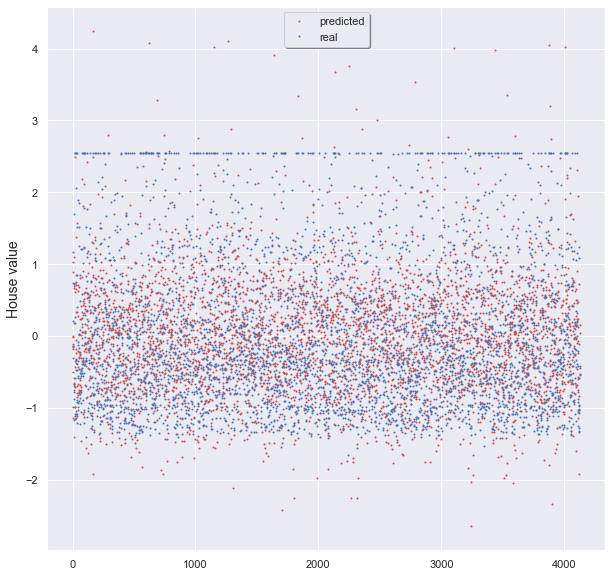

In [62]:
createPlot(x_test, y_test, separator, STORE_IMAGES + 'pca_all_components_plot')

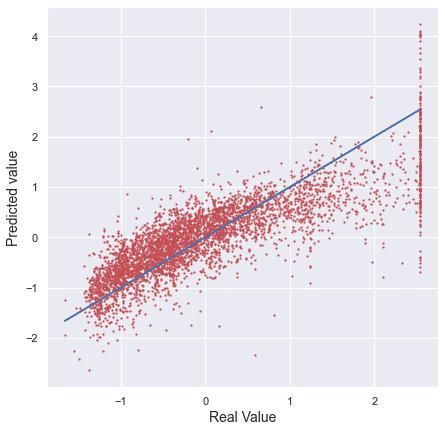

In [63]:
createScatter(x_test, y_test, separator, STORE_IMAGES + 'pca_all_components_scatter')